In [1]:
import pespectrum as pe
from pygama.lgdo.lh5_store import show
from pygama.lgdo.lh5_store import ls
import simultaneous_waveviewer
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import sys
from scipy.optimize import curve_fit
import csv

filenr = 231824
data = "/mnt/atlas01/users/shofinger/dsp_7/b/" + str(filenr) +".lh5"
include_channel = ["OB-01","OB-02","OB-03","OB-05","OB-06","OB-07","OB-08","OB-09","OB-12","OB-13","OB-14","OB-17","OB-21","OB-22","OB-23","OB-24","OB-25","OB-26","OB-28","OB-29","OB-31","OB-35","OB-36","OB-37","OB-38","OB-39","OB-40"]
#bad channels ,"OB-16","OB-30"
#show(data)

cmap = open("/mnt/atlas01/projects/legend/data/com/raw/2022-04-13-sipm-test/channel-map.json")

channel_map = json.load(cmap)
channel_dict = {}
for i in channel_map["hardware_configuration"]["channel_map"]:
    channel_dict[channel_map["hardware_configuration"]["channel_map"][i]["det_id"]] = i
channel=[channel_dict[i] for i in include_channel]


In [2]:
pes = pe.create_spectrum(data,include_channel)
#print(y)

Process for OB-01 has finished
Process for OB-02 has finished
Process for OB-03 has finished
Process for OB-05 has finished
Process for OB-06 has finished
Process for OB-07 has finished
Process for OB-08 has finished
Process for OB-09 has finished
Process for OB-12 has finished
Process for OB-13 has finished
Process for OB-14 has finished
Process for OB-17 has finished
Process for OB-21 has finished
Process for OB-22 has finished
Process for OB-23 has finished
Process for OB-24 has finished
Process for OB-25 has finished
Process for OB-26 has finished
Process for OB-28 has finished
Process for OB-29 has finished
Process for OB-31 has finished
Process for OB-35 has finished
Process for OB-36 has finished
Process for OB-37 has finished
Process for OB-38 has finished
Process for OB-39 has finished
Process for OB-40 has finished


In [3]:
area_dict = {
 "OB-01":[6,   12,   15,   20],
 "OB-02":[9,   13,   20,   25],
 "OB-03":[8,   13,   17,   24],
 "OB-05":[8,   13,   19,   24],
 "OB-06":[8,   13,   17,   23],
 "OB-07":[9,   14,   21,   26],
         
 "OB-08":[7,   12,   17,   22],
 "OB-09":[8,   13,   19,   24],
 "OB-12":[10,   15,   22,   28],
 "OB-13":[8,   12,   18,   23],
 "OB-14":[7,   12,   17,   22],
 "OB-16":[5,   15,   17,   25],
         
 "OB-17":[10,  14,   22,   26],
 "OB-21":[7,   11,   16,   19],
 "OB-22":[9,   13,   20,   25],
 "OB-23":[15,  19,   32,   36],
 "OB-24":[14,  18,   30,   34],
 "OB-25":[7 ,  10,   15,   20],
         
 "OB-26":[9,   14,   20,   26],
 "OB-28":[6,   10,   15,   17],
 "OB-29":[11,  17,   26,   34],
 "OB-30":[5,   15,   15,   25],
 "OB-31":[12,  19,   29,   35],
 "OB-35":[10,  15,   24,   27],
         
 "OB-36":[8,   12,   19,   22],
 "OB-37":[9,   15,   22,   28],
 "OB-38":[9,   14,   21,   25],
 "OB-39":[6,   12,   15,   23],
 "OB-40":[7,   14,   17,   24]}
   
areas=[area_dict[i] for i in include_channel]


In [4]:

result,conv = pe.fit_gaus(pes,areas,10)
#print(result)

27/27

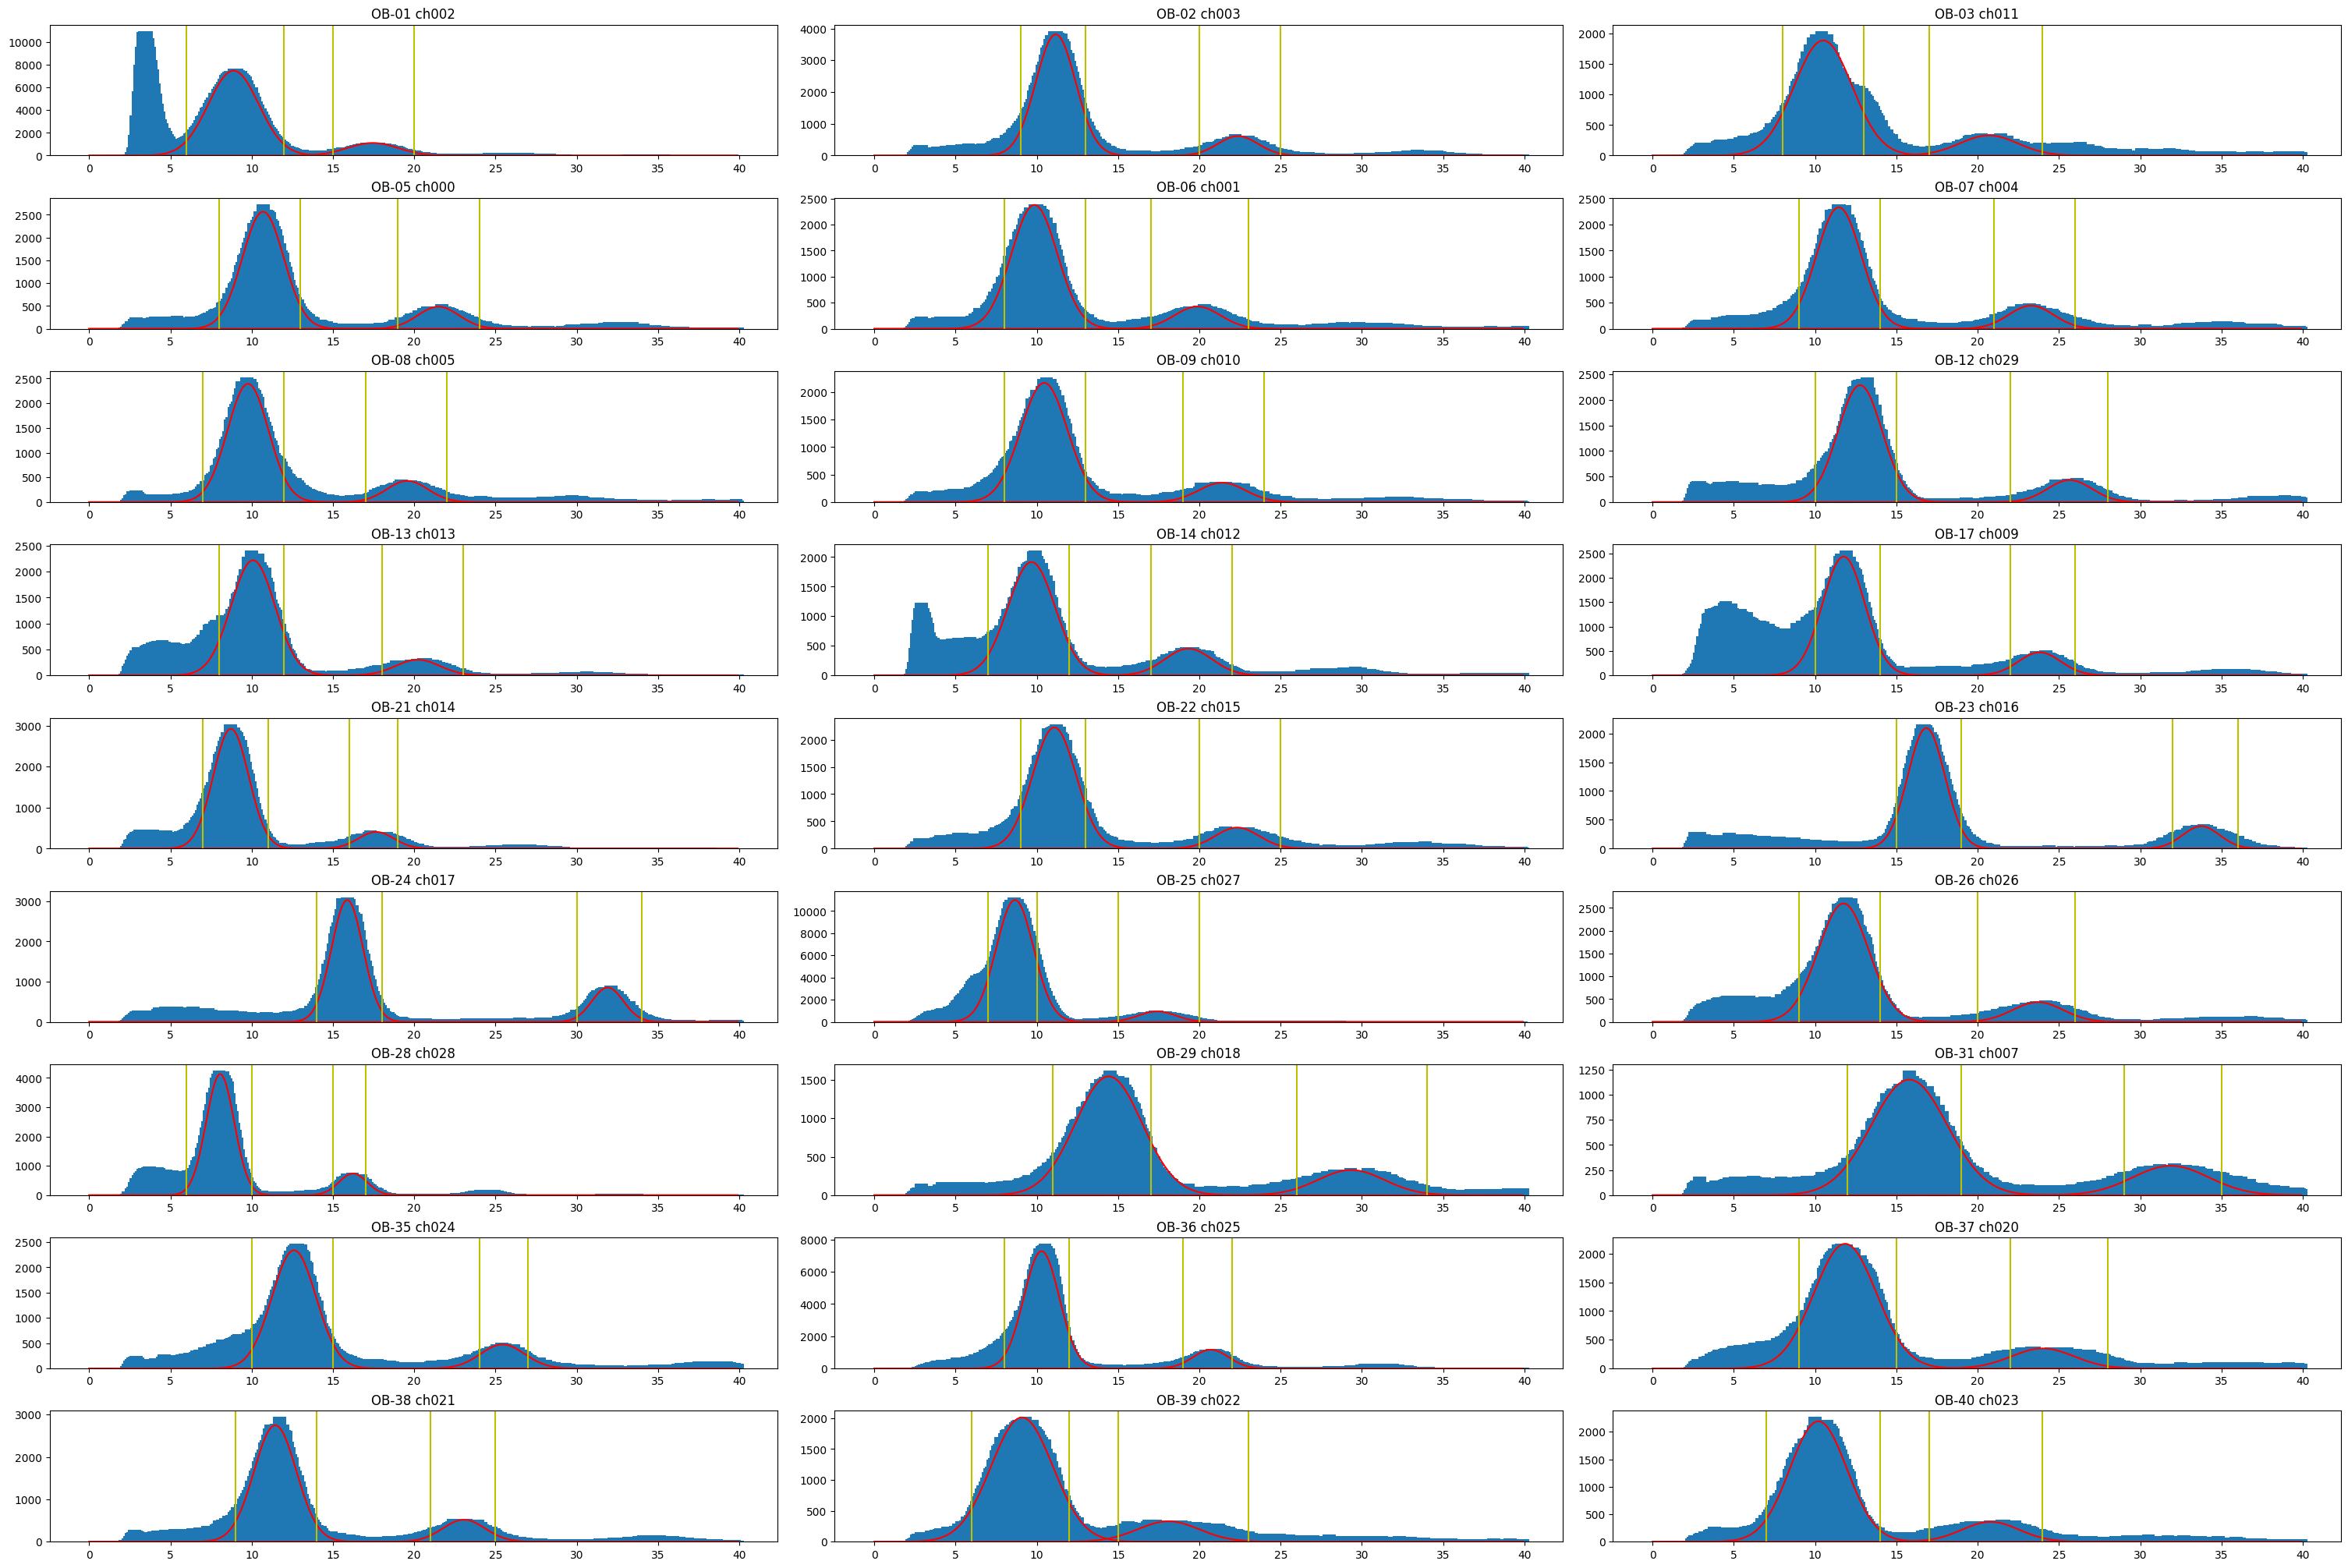

In [5]:
mul_width = 3
mul_figsize = (30,20)
maxprint = 400
fig, axs = plt.subplots(ncols=mul_width, nrows=math.ceil(len(pes)/mul_width), figsize=mul_figsize,layout="constrained")
for i in range(len(pes)):
    axs[math.floor(i/mul_width),i%mul_width].bar(pes[i][1][0:maxprint],pes[i][0][0:maxprint])
    gaus0 = pe.gaus(pes[i][1][0:maxprint],result[i][0][0],result[i][0][1],result[i][0][2])
    gaus1 = pe.gaus(pes[i][1][0:maxprint],result[i][1][0],result[i][1][1],result[i][0][2])
    axs[math.floor(i/mul_width),i%mul_width].plot(pes[i][1][0:maxprint],gaus0,color='r')
    axs[math.floor(i/mul_width),i%mul_width].plot(pes[i][1][0:maxprint],gaus1,color='r')
    for j in range(4):
        axs[math.floor(i/mul_width),i%mul_width].axvline(areas[i][j],color='y')
        
        axs[math.floor(i/mul_width),i%mul_width].set_title(include_channel[i]+ " "+ str(channel[i]))
        

plt.savefig("20220418-"+ str(filenr) + "-m6-muon-amajl3-mmaj3-es2000_image")
plt.show()

In [6]:
calibration = {}
for i,j in enumerate(include_channel):
    calibration[j] = result[i]

print(calibration)    

with open("calibration_data_"+ str(filenr),"w") as f:
    json.dump(calibration,f,)

{'OB-01': [[7468.121085155086, 8.879722117609115, 1.5469241691831317], [1109.3300124197635, 17.443713034512598, 1.797643793268198]], 'OB-02': [[3817.296317898069, 11.162617219139745, 1.2256002604008926], [612.8444196184114, 22.37227007968231, 1.7122580563487748]], 'OB-03': [[1886.883063262587, 10.49457665950417, 1.7787998927006108], [330.41362158122496, 20.68897617300159, 2.4726586067107297]], 'OB-05': [[2566.9576569886713, 10.697781817222637, 1.2744273266390704], [485.45157650268015, 21.485938616929207, 1.7949485382260297]], 'OB-06': [[2378.2266146864, 9.849768869527438, 1.411432148947012], [427.8378676395706, 19.88164053642625, 2.183161051093833]], 'OB-07': [[2328.996867721276, 11.458179538494925, 1.3754239979996477], [444.89720541128645, 23.28514814758646, 2.012623455228629]], 'OB-08': [[2393.884472043927, 9.77121818238121, 1.2620196699345658], [428.46118993441365, 19.575231272889756, 1.7513117054049077]], 'OB-09': [[2168.0592846474997, 10.44957615084151, 1.4369037561013533], [352.0